In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.datasets import load_wine

In [64]:
wine=load_wine()

In [129]:
Y=wine["target"]
Y=np.reshape(Y,(len(Y),1))
X=wine["data"]

In [136]:
pd.DataFrame(wine['data']).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [137]:
pd.DataFrame(wine['target']).groupby(0).size()

0
0    59
1    71
2    48
dtype: int64

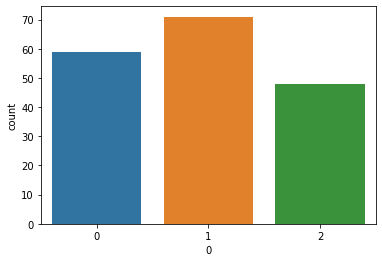

In [138]:
sb.countplot(x=0, data=pd.DataFrame(wine['target']))

In [156]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3)
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [100]:
def refine_Y(Y):
    Y=np.array(Y)
    Y=np.reshape(Y,(len(Y),1))
    y_zero=np.zeros((3,len(Y)))
    for i in range(len(Y)):
        c=Y[i][0]
        y_zero[c][i]=1
    return y_zero

In [139]:
def parameter_initialize():
    a=np.random.rand(3,13)*0.01
    b=np.random.rand(3,1)
    return a,b

In [141]:
def Z(X,a,b):
    z=np.dot(X,a.T).T+b
    return z.T

In [142]:
def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a

In [143]:
def foward(X,theta,b):
    z=Z(X,theta,b)
    a=sigmoid(z)
    return a.T

In [145]:
def cost(y_pred, y_ref):
    error=-(y_ref*np.log(y_pred)+(1-y_ref)*np.log(1-y_pred))
    
    return np.sum(error)/y_ref.shape[0]

In [146]:
def Dee_Z(y_pred,Y):
    dee_z=y_pred-Y
    return dee_z

In [147]:
def Dee_parameter(X,dz):
    dee_theta=np.dot(dz,X)/X.shape[0]
    dee_b=np.sum(dz, axis=1)/X.shape[0]
    dee_b=np.reshape(dee_b,(dz.shape[0],1))
    return dee_theta.T, dee_b

In [148]:
def back(X,Y,y_pred):
    dz=Dee_Z(y_pred,Y)
    dee_theta, dee_b=Dee_parameter(X,dz)
    return dee_theta, dee_b

In [150]:
def update(m,theta, b,dee_theta, dee_b, learning_rate):
    theta -=learning_rate*dee_theta.T
    b -=learning_rate*dee_b
    return theta,b

In [158]:
import matplotlib.pyplot as plt
def Model(X,Y):
    Y=refine_Y(Y)
    J,x=[],[]
    theta, b=parameter_initialize()
    m=Y.shape[1]
    lambdas=0
    for i in range(1000):
        y_pred=foward(X,theta,b)
        error=cost(y_pred,Y)
        x.append(i)
        J.append(error)
        dee_theta, dee_b=back(X,Y,y_pred)
        theta,b=update(m,theta, b,dee_theta, dee_b, 0.1)
        #print(error)
    plt.plot(x,J)
    return theta,b
    

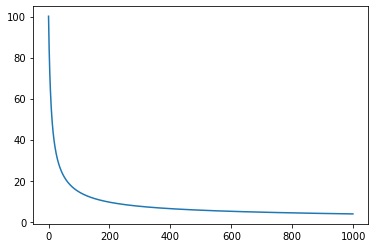

In [159]:
theta,b=Model(x_train,y_train)

In [160]:
def predict(X,theta,b):
    y_pred=foward(X,theta,b)
    y_pred=y_pred.T
    return y_pred.argmax(axis=1)

In [162]:
pred=predict(x_train,theta,b)

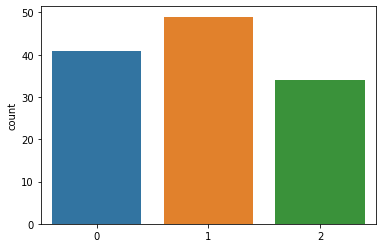

In [165]:
sb.countplot(x=pred)

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_train, pred))
print(confusion_matrix(y_train,pred))

1.0
[[41  0  0]
 [ 0 49  0]
 [ 0  0 34]]


In [167]:
test=predict(x_test,theta,b)

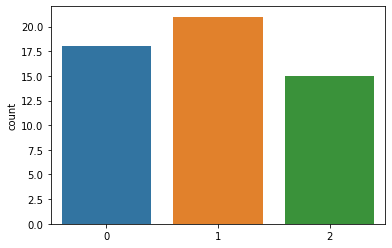

In [171]:
sb.countplot(x=test)

In [172]:
print(confusion_matrix(y_test,test))
print(accuracy_score(y_test, test))

[[18  0  0]
 [ 0 21  1]
 [ 0  0 14]]
0.9814814814814815
